<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/ML/PCA/classified_DatingWeb_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Define functions to connect to Google and change directories
def connectDrive():
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

def changeDirectory(path):
    import os
    original_path = os.getcwd()
    os.chdir(path)
    new_path = os.getcwd()
    print("Original path: ",original_path)
    print("New path: ",new_path)

# Connect to Google Drive
connectDrive()

# Change path
changeDirectory("/content/drive/My Drive/github/DatedWeb/")

Mounted at /content/drive
Original path:  /content
New path:  /content/drive/My Drive/github/DatedWeb


In [2]:
%matplotlib inline
from sklearn import neighbors, datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp 
from sklearn import utils
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import os, time, pickle, gzip
import datetime

In [3]:
from numpy import *
import operator
from os import listdir

def file2matrix(filename):
	fr = open(filename)
	numberOfLines = len(fr.readlines())
	returnMat = zeros((numberOfLines, 3))
	classLabelVector = []
	fr = open(filename)
	index = 0
	for line in fr.readlines():
		line = line.strip()
		listFromLine = line.split('\t')
		returnMat[index,:] = listFromLine[0:3]
		classLabelVector.append(str(listFromLine[3]))
		index += 1
	return returnMat, classLabelVector

In [4]:
datingDataMat, datingLabels = file2matrix('datingTestSet.txt')

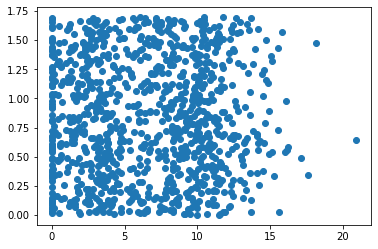

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2])
plt.show()

In [6]:
train_data, test_data, train_target, test_target = train_test_split(
    datingDataMat, datingLabels, test_size=0.3, train_size=0.7, random_state=123)

In [7]:
print(type(train_data),type(train_target),type(test_data),type(test_target))

<class 'numpy.ndarray'> <class 'list'> <class 'numpy.ndarray'> <class 'list'>


In [8]:
train_target = np.array(train_target)
test_target = np.array(test_target)
print(type(train_data),type(train_target),type(test_data),type(test_target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
# Verify shape of datasets
print("Shape of train_data: ", train_data.shape)
print("Shape of train_target: ", train_target.shape)
print("Shape of test_data: ", test_data.shape)
print("Shape of test_target: ", test_target.shape)

Shape of train_data:  (700, 3)
Shape of train_target:  (700,)
Shape of test_data:  (300, 3)
Shape of test_target:  (300,)


In [10]:
# Create Pandas DataFrames from the datasets
train_index = range(0,len(train_data))
test_index = range(len(test_data))

X_train = pd.DataFrame(data=train_data,index=train_index)
y_train = pd.Series(data=train_target,index=train_index)

X_test = pd.DataFrame(data=test_data,index=test_index)
y_test = pd.Series(data=test_target,index=test_index)

In [11]:
# Describe the training matrix
X_train.describe()

,0,1,2
count,700.000000,700.000000,700.000000
mean,33757.927143,6.657736,0.849052
std,21801.944280,4.266154,0.498621
min,0.000000,0.000000,0.001156
25%,14244.500000,3.025890,0.426735
50%,32224.500000,6.800987,0.831570
75%,46601.500000,10.040654,1.290498
max,91273.000000,20.919349,1.694641


In [12]:
# Show the labels
y_train.head()

0     didntLike
1    largeDoses
2     didntLike
3    smallDoses
4    smallDoses
dtype: object

In [13]:
def label_list(stri):
  li = np.unique(stri)
  num = len(li)
  licode = np.arange(num)
  dic = dict(zip(li,licode))
  ny = np.array([dic.get(item,item)  for item in stri])
  return(ny)

In [14]:
# Create one-hot vectors for the labels
y_train_lbl = label_list(y_train)
y_test_lbl = label_list(y_test)

In [15]:
print(y_train_lbl.shape, y_test_lbl.shape)

(700,) (300,)


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [17]:
from sklearn.pipeline import make_pipeline
model_pl_knn = make_pipeline(
    StandardScaler(),
    PCA(2),
    KNeighborsClassifier()
)
model_pl_knn.fit(X_train, y_train_lbl)
y_pred = model_pl_knn.predict(X_test)


In [18]:
print(y_pred.shape, y_test_lbl.shape)

(300,) (300,)


In [19]:
print(y_test_lbl[:5], y_pred[:5])
print(np.unique(y_test_lbl))
print(np.unique(y_train))

[2 2 2 1 0] [2 2 2 1 1]
[0 1 2]
['didntLike' 'largeDoses' 'smallDoses']


In [20]:
print('整體正確率:',accuracy_score(y_test_lbl, y_pred).round(2))
confusion_matrix(y_test_lbl, y_pred)

整體正確率: 0.82


array([[70, 26,  5],
       [10, 79,  0],
       [10,  2, 98]])

In [21]:
# Principal Component Analysis
from sklearn.decomposition import PCA

n_components = 2
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

In [22]:
# Define scatterplot function 
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

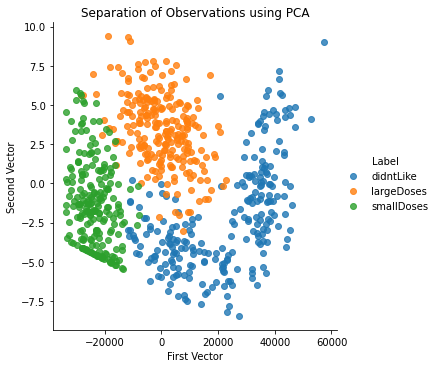

In [23]:
# View scatterplot
scatterPlot(X_train_PCA, y_train, "PCA")

In [28]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [25]:
print(d)

1


In [31]:
print(X_train.shape)

(700, 3)


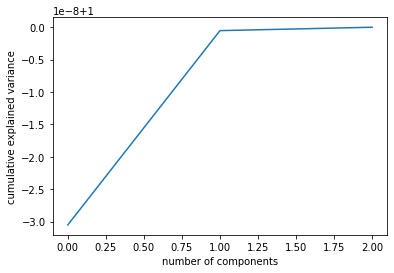

In [30]:
pca = PCA()
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');